## Complete EDA before training the data

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
df = pd.read_csv('bodyfat.csv')

In [438]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [439]:
df.isna() 
#no null values present

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [440]:
df[df["BodyFat"]<=5]
#as per medical sciences, minimum bodyfat for a human being is between 2.5 to 5,So I'll remove BodyFat less than 3


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
25,1.0911,3.7,27,159.25,71.50,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
28,1.0910,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2
49,1.0903,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8
54,1.0906,3.9,42,136.25,67.50,37.8,87.6,77.6,88.6,51.9,34.9,22.5,27.7,27.5,18.5
170,1.0926,3.0,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
171,1.0983,0.7,35,125.75,65.50,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
181,1.1089,0.0,40,118.50,68.00,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [441]:
df.drop(df[df['BodyFat'] <= 3].index, inplace = True)


In [442]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.055039,19.366667,44.983936,179.487751,70.185743,38.028916,100.985542,92.762249,100.036145,59.511647,38.635743,23.122490,32.329317,28.696386,18.244177
std,0.018491,8.181252,12.642723,29.066472,3.667216,2.416686,8.326664,10.666575,7.096891,5.180483,2.387393,1.692362,2.985243,2.006910,0.928218
min,0.995000,3.700000,22.000000,125.000000,29.500000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,21.000000,15.800000
25%,1.041400,12.900000,36.000000,159.750000,68.500000,36.400000,94.900000,85.300000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054700,19.300000,44.000000,176.750000,70.250000,38.000000,99.700000,91.100000,99.300000,59.100000,38.500000,22.800000,32.100000,28.800000,18.300000
75%,1.069300,25.300000,54.000000,197.000000,72.250000,39.500000,105.600000,99.700000,103.600000,62.500000,40.000000,24.000000,34.400000,30.000000,18.800000
max,1.099100,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [443]:
#Converting weight in Pound to Weight in Kilograms(KG) as per Indian Standards 
df['Weight'] = df['Weight']*0.453592
df['Height'] = df['Height']*2.54

In [444]:
df.describe()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.055039,19.366667,44.983936,81.414208,178.271787,38.028916,100.985542,92.762249,100.036145,59.511647,38.635743,23.122490,32.329317,28.696386,18.244177
std,0.018491,8.181252,12.642723,13.184319,9.314729,2.416686,8.326664,10.666575,7.096891,5.180483,2.387393,1.692362,2.985243,2.006910,0.928218
min,0.995000,3.700000,22.000000,56.699000,74.930000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,21.000000,15.800000
25%,1.041400,12.900000,36.000000,72.461322,173.990000,36.400000,94.900000,85.300000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054700,19.300000,44.000000,80.172386,178.435000,38.000000,99.700000,91.100000,99.300000,59.100000,38.500000,22.800000,32.100000,28.800000,18.300000
75%,1.069300,25.300000,54.000000,89.357624,183.515000,39.500000,105.600000,99.700000,103.600000,62.500000,40.000000,24.000000,34.400000,30.000000,18.800000
max,1.099100,47.500000,81.000000,164.721935,197.485000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


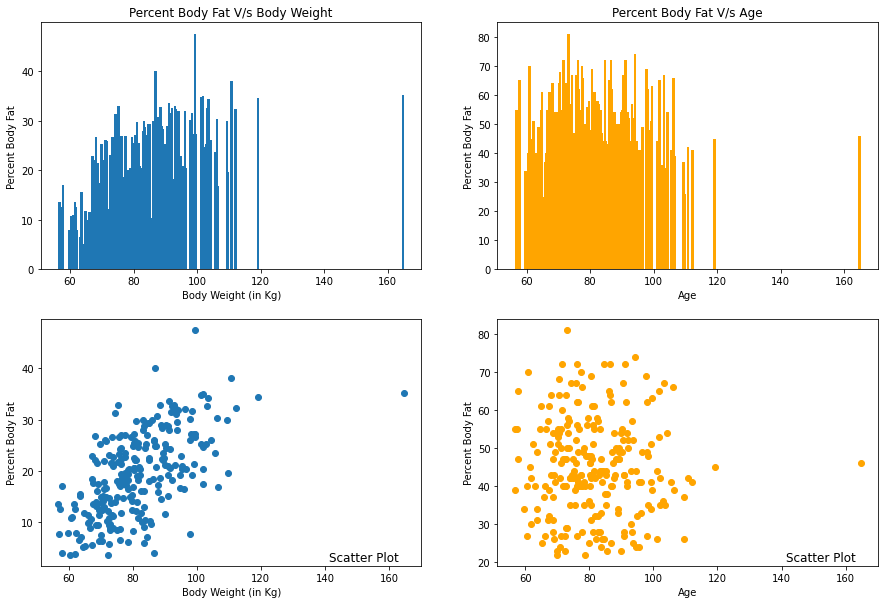

In [445]:
#plotting Body fat percent with respect to the weight and Age
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.bar(df["Weight"], df["BodyFat"])
plt.xlabel("Body Weight (in Kg)")
plt.ylabel("Percent Body Fat")
plt.title("Percent Body Fat V/s Body Weight")
plt.subplot(2,2,2)
plt.bar(df["Weight"], df["Age"],color ='orange')
plt.xlabel("Age")
plt.ylabel("Percent Body Fat")
plt.title("Percent Body Fat V/s Age")

plt.subplot(2,2,3)
plt.scatter(df["Weight"], df["BodyFat"])
plt.xlabel("Body Weight (in Kg)")
plt.ylabel("Percent Body Fat")
plt.title("Scatter Plot",y=-0.005 ,x=0.85)

plt.subplot(2,2,4)
plt.scatter(df["Weight"], df["Age"],color ='orange')
plt.xlabel("Age")
plt.ylabel("Percent Body Fat")
plt.title("Scatter Plot",y=-0.005 ,x=0.85)


plt.show()

## Splitting Train & Test Data

In [446]:
## not including Density 
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.33,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 13)
(83, 13)
(166,)
(83,)


# (a) Linear Regression

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)
#mse = cross_val_score(lin_reg,X_train,y_train, scoring = 'neg_mean_squared_error',cv=5)
#mean_mse = np.mean(mse)

LinearRegression()

In [448]:
pred_lin = lin_reg.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score1 = r2_score(pred_lin,y_test)
rmse_score1 = np.sqrt(mean_squared_error(pred_lin, y_test))
score = lin_reg.score(X_test, y_test)
print("R2 Score for Linear Regression for test data:",r2_score1)
print("RMSE for test:",rmse_score1)
#print(score)

R2 Score for Linear Regression for test data: 0.6740786376846659
RMSE for test: 4.4850665905766975


In [449]:
y_predtrain = lin_reg.predict(X_train)
r2_scoretrain = r2_score(y_predtrain,y_train)
print("R2 Score for Linear Regression for training data:",r2_scoretrain)
#Performance for Training data and testing data is almost equal hence its a generalized model

R2 Score for Linear Regression for training data: 0.7046552468948144


[Text(0.5, 1.0, 'Linear Regressor for the Model')]

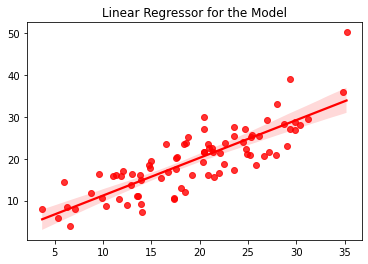

In [470]:
sns.regplot(x=y_test, y=pred_lin,color ="red").set(title='Linear Regressor for the Model')

## (b)Random Forest Regression

In [451]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [452]:
rf_model = RandomForestRegressor()

params = {
    'n_estimators': np.arange(50, 401, 100),
    'max_features': ['auto', 'sqrt'],
    'max_depth': np.arange(5, 11),
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    estimator=rf_model, param_grid = params,
    cv=4, refit=True,
    n_jobs=-1, verbose=2
)

rf_grid.fit(X_train, y_train)

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': array([ 50, 150, 250, 350])},
             verbose=2)

In [453]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 250}
0.6345499027008418


In [454]:
pred_rf = rf_grid.predict(X_test)
rf_predictions_train = rf_grid.predict(X_train)

In [455]:
rf_r2 = r2_score(y_test, pred_rf)
rf_r2_train = r2_score(y_train,rf_predictions_train)

rf_rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_predictions_train))

print("R2 Score for Random Forest for test data: ", rf_r2)
print("RMSE Score for Random Forest for test Data : ", rf_rmse)
print("R2 Score for Random Forest for train data : ", rf_r2_train)
print("RMSE Score for Random Forest for train Data: ", rf_rmse_train)
#Slight Overfitting is there

R2 Score for Random Forest for test data:  0.6273011334284094
RMSE Score for Random Forest for test Data :  4.397538141134261
R2 Score for Random Forest for train data :  0.8928615401957816
RMSE Score for Random Forest for train Data:  2.816706276345166


## (c)K nearest Neighbor(KNN) Regressor

In [456]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [457]:
params1 = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params1,cv=5)
model.fit(X_train,y_train)
model.best_params_
#getting the best K value using GridSearchCV


{'n_neighbors': 6}

In [458]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
scaled_train= ss.fit_transform(X_train)
scaled_test = ss.fit_transform(X_test)

In [484]:
knn= KNeighborsRegressor(n_neighbors=9)
knn.fit(scaled_train,y_train)
score_knn = knn.score(scaled_test,y_test)
print("KNN Score :", score_knn)
pred_knn = knn.predict(scaled_test)

KNN Score : 0.549939410130574


In [485]:
knn_r2 = r2_score(y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test,pred_knn)) 


print("RMSE for KNN: ",rmse_knn)
print(knn_r2)


RMSE for KNN:  4.832435559575887
0.549939410130574


## (d) Lasso Regression

In [461]:
from sklearn.linear_model import Lasso

In [471]:
lasso = Lasso()
params2 = {"alpha": np.linspace(0, 2, 200)}


lasso_regressor = GridSearchCV(lasso,params2,scoring = 'neg_mean_squared_error',cv =5)
lasso_regressor.fit(X_train,y_train)


C:\Users\sarth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sarth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sarth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+03, tolerance: 8.536e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.01005025, 0.0201005 , 0.03015075, 0.04020101,
       0.05025126, 0.06030151, 0.07035176, 0.08040201, 0.09045226,
       0.10050251, 0.11055276, 0.12060302, 0.13065327, 0.14070352,
       0.15075377, 0.16080402, 0.17085427, 0.18090452, 0.19095477,
       0.20100503, 0.21105528, 0.22110553, 0.23115578, 0.24120603,
       0.25125628, 0.26130653...
       1.70854271, 1.71859296, 1.72864322, 1.73869347, 1.74874372,
       1.75879397, 1.76884422, 1.77889447, 1.78894472, 1.79899497,
       1.80904523, 1.81909548, 1.82914573, 1.83919598, 1.84924623,
       1.85929648, 1.86934673, 1.87939698, 1.88944724, 1.89949749,
       1.90954774, 1.91959799, 1.92964824, 1.93969849, 1.94974874,
       1.95979899, 1.96984925, 1.9798995 , 1.98994975, 2.        ])},
             scoring='neg_mean_squared_error')

In [472]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1.2160804020100502}
-20.36702830430829


In [473]:
pred_lasso = lasso_regressor.predict(X_test)
r2_scorelasso = r2_score(pred_lasso,y_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, pred_lasso))
print("R2 Score For Lasso Regression:",r2_scorelasso)
print("RMSE for Lasso: ",lasso_rmse)

R2 Score For Lasso Regression: 0.6044092351944793
RMSE for Lasso:  4.510129079594291


## (e) Ridge Regressor

In [465]:
from sklearn.linear_model import Ridge

In [466]:
ridge = Ridge()
param2 =  {'alpha':[0.5,1,1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,200,100000]}
ridge_regressor = GridSearchCV(ridge,param2,scoring = 'neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 1e-15, 1e-10, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20, 200, 100000]},
             scoring='neg_mean_squared_error')

In [467]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 200}
-21.5911817849302


In [468]:
pred_ridge = ridge_regressor.predict(X_test)
r2_scoreridge = r2_score(pred_ridge,y_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, pred_ridge))
print("R2 Score For Ridge Regression:",r2_scoreridge)
print("RMSE for Ridge: ",ridge_rmse)

R2 Score For Ridge Regression: 0.6391144377620839
RMSE for Ridge:  4.491533977659779


# Evaluation Of All Models

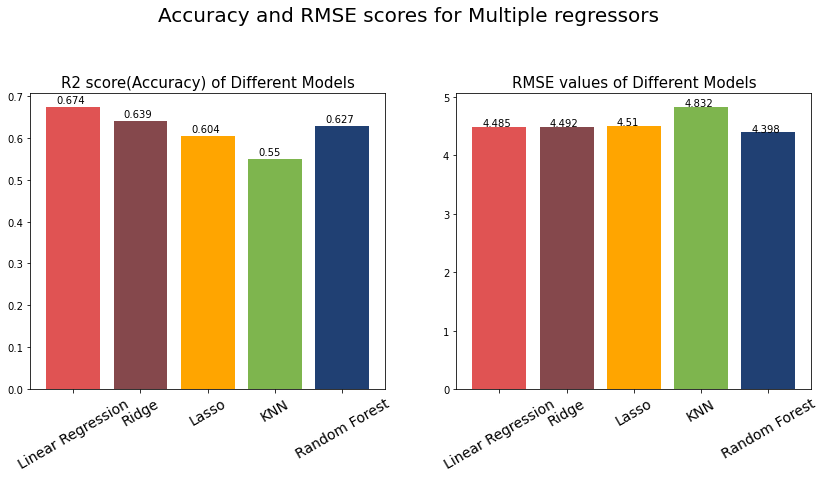

In [474]:
r2_scores = [r2_score1,r2_scoreridge,r2_scorelasso,score_knn,rf_r2]
algo_names = ['Linear Regression','Ridge','Lasso','KNN','Random Forest']
rmse_scores = [rmse_score1,ridge_rmse,lasso_rmse,rmse_knn,rf_rmse]

plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
plt.bar(algo_names,r2_scores,color = ['#e05353','#85484c','orange','#7eb54e','#204073'])
plt.title("R2 score(Accuracy) of Different Models",fontsize=15)
plt.xticks(fontsize=14, rotation=30)
for i, v in enumerate(r2_scores):
    plt.text(i-.25, v+.01, np.round(v,3))

plt.subplot(2,2,2)
plt.bar(algo_names,rmse_scores,color = ['#e05353','#85484c','orange','#7eb54e','#204073'])
plt.title("RMSE values of Different Models",fontsize=15)
plt.xticks(fontsize=14, rotation=30)
for i, v in enumerate(rmse_scores):
    plt.text(i-.25, v+.01, np.round(v,3))

plt.suptitle('Accuracy and RMSE scores for Multiple regressors',fontsize=20)


plt.show()

#### Highest Accuracy Obtained is 67% using LinearRegression and Lowest RMSE score obtained is 4.398 by Random Forest Regressor